# Lab 6: Cleaning Data

**Objective**
1. Formulate a research question answerable by a dataset
2. Manipulate the dataset and create a data visualization to answer a research question
3. Summarize the steps of the data cleaning process and hypothesize about the importance of cleaning


**Rubric**
- 4 points: Complete the Jupyter Notebook as described. Analysis and written portions are completed in a professional manner. Use complete sentences and correct grammar.
- 3 points: Completes only some of the Jupyter Notebook as described, or submission does not meet professionalism standards.
- 2 points: Missing or incomplete

---
## Write your question

1. Create an account/login to [Kaggle](https://www.kaggle.com/)
2. Choose a dataset you are interested in
3. Write a research question you can answer by creating a data visualization(graph). Be specific! Make sure your question is actually something your dataset can answer. You will probably need to do some research into how the data was collected in order to write your specific question

**Question: What is the corrolation between last updated and usability score**

## Import and explore the data

4. Import your dataset


In [305]:
file  = open("data.csv")
for i in file.readlines():
    print(i.replace(",","| ").strip())

Dataset Name                                                               | Created By                                        | Last Updated in number of days | Usability Score | Number of File | Type of file         | Size   | Total Votes | Category
Animal Crossing New Horizons Catalog                                       | Jessica Li                                        | 1095                           | 8.8             | 30             | CSV                  | 591 kB | 42360       | Gold
Animal Crossing New Horizons Catalog                                       | Jessica Li                                        | 1095                           | 8.8             | 30             | CSV                  | 600 kB | 42360       | Gold
Credit Card Fraud Detection                                                | Machine Learning Group - ULB                      | 2190                           | 8.5             | 1              | CSV                  | 69 MB  | 11038       | Gold
COVI

5. Explain each of the columns in your dataset 
- Dataset Name: name of the data
- Created By: Who Created it
- Last Updated in number of days: Last time it was updated
- Usability Score: The score people gave it on how useable it is
- Number of File: File count
- Type of file: types of files in the data set
- Size: Size of the whole data set
- Total Votes: toal amount of votes for the usability Score
- Category: i am guessing ranking

Show the data types for each column. If they do not match what you anticipated, change the datatypes so they make sense.

In [306]:
import pandas as pd
import numpy as np
df = pd.read_csv("data.csv")
for i in df.columns:
    df[i.strip()] = df.loc[:,[i]]
    df = df.drop(columns=i)
    
for i in df.index:
    for col in df.columns:
        df.loc[[i],[col]] = df.loc[[i],[col]].values[0][0].strip()
        if df.loc[[i],[col]].values[0][0] == "-": # if value for col is "-" now is NaN
            df.loc[[i],[col]] = np.nan
        elif df.loc[[i],[col]].values[0][0].isdigit():
            df.loc[[i],[col]] = float(df.loc[[i],[col]].values[0][0])


df = df.set_index(keys=df["Dataset Name"]).drop(columns="Dataset Name")
df

,Created By,Last Updated in number of days,Usability Score,Number of File,Type of file,Size,Total Votes
Dataset Name,,,,,,,
Animal Crossing New Horizons Catalog,Jessica Li,1095.0,8.8,30.0,CSV,591 kB,42360.0
Animal Crossing New Horizons Catalog,Jessica Li,1095.0,8.8,30.0,CSV,600 kB,42360.0
Credit Card Fraud Detection,Machine Learning Group - ULB,2190.0,8.5,1.0,CSV,69 MB,11038.0
COVID-19 Open Research Dataset Challenge,Allen Institute For AI,730.0,8.8,717120.0,"JSON, CSV, other",20 GB,10729.0
Netflix Movies and TV Shows,Shivam Bansal,730.0,10.0,1.0,CSV,1 MB,8161.0
...,...,...,...,...,...,...,...
Adidas vs Nike,Kash,1095.0,10.0,1.0,CSV,284 kB,80.0
World Happiness Report 2023,Ajaypal Singh,365.0,9.4,1.0,CSV,7 kB,80.0
TikTok Trending Videos,Erik van de Ven,1095.0,8.2,1005.0,"other, JSON, CSV",3 GB,80.0


6. Check your dataset for missing or incomplete data.

How many rows and columns are there?

In [307]:
print(f"Rows: {len(df.index)}, Columns: {len(df.columns)}")

Rows: 2500, Columns: 7


Saving the amount of file types

Do you need all of the rows/columns for the data visualization you are making? Remove the extra rows/columns.

In [308]:
df = df.drop(columns=["Created By","Type of file"])
df

,Last Updated in number of days,Usability Score,Number of File,Size,Total Votes
Dataset Name,,,,,
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,591 kB,42360.0
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,600 kB,42360.0
Credit Card Fraud Detection,2190.0,8.5,1.0,69 MB,11038.0
COVID-19 Open Research Dataset Challenge,730.0,8.8,717120.0,20 GB,10729.0
Netflix Movies and TV Shows,730.0,10.0,1.0,1 MB,8161.0
...,...,...,...,...,...
Adidas vs Nike,1095.0,10.0,1.0,284 kB,80.0
World Happiness Report 2023,365.0,9.4,1.0,7 kB,80.0
TikTok Trending Videos,1095.0,8.2,1005.0,3 GB,80.0


How many data points are in each row? Is there any missing data in your table? If so, how do you want to address the missing data?

In [309]:
storcon = {"b": 1,"kb":1,"mb":1000,"gb":1000000}
df["SizeConv"] = {}
for ind in df.index:
    sizeda = str(df.loc[[ind],["Size"]].values[0][0]).split(" ")
    if len(sizeda) == 2 and sizeda[1].lower() in storcon:
        df.loc[[ind],["SizeConv"]] = storcon[sizeda[1].lower()]*int(sizeda[0])
    else:
        df.loc[[ind],["SizeConv"]] = np.nan
df["Size"] = df["SizeConv"]
df = df.drop(columns="SizeConv")
df

,Last Updated in number of days,Usability Score,Number of File,Size,Total Votes
Dataset Name,,,,,
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,591,42360.0
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,591,42360.0
Credit Card Fraud Detection,2190.0,8.5,1.0,69000,11038.0
COVID-19 Open Research Dataset Challenge,730.0,8.8,717120.0,20000000,10729.0
Netflix Movies and TV Shows,730.0,10.0,1.0,1000,8161.0
...,...,...,...,...,...
Adidas vs Nike,1095.0,10.0,1.0,284,80.0
World Happiness Report 2023,365.0,9.4,1.0,7,80.0
TikTok Trending Videos,1095.0,8.2,1005.0,3000000,80.0


Does your data include any null values(or something in place of null values)? Replace those characters with `np.nan` values.

In [310]:
for id in df.index:
    try:
        usab = float(df.loc[[id],["Usability Score"]].values[0][0])
        if usab < 0 or usab > 10:
            df.loc[[id],["Usability Score"]] = np.nan
    except:
        df.loc[[id],["Usability Score"]] = np.nan



df = df.dropna()
df

,Last Updated in number of days,Usability Score,Number of File,Size,Total Votes
Dataset Name,,,,,
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,591,42360.0
Animal Crossing New Horizons Catalog,1095.0,8.8,30.0,591,42360.0
Credit Card Fraud Detection,2190.0,8.5,1.0,69000,11038.0
COVID-19 Open Research Dataset Challenge,730.0,8.8,717120.0,20000000,10729.0
Netflix Movies and TV Shows,730.0,10.0,1.0,1000,8161.0
...,...,...,...,...,...
Adidas vs Nike,1095.0,10.0,1.0,284,80.0
World Happiness Report 2023,365.0,9.4,1.0,7,80.0
TikTok Trending Videos,1095.0,8.2,1005.0,3000000,80.0


Does your data have any duplicate values? You will probably want to use `df.duplicated()`.

In [311]:
#Probally
df = df.drop_duplicates(keep=False)
df = df.reset_index()

dupes = {}
for id in df.index:
    N,L = df.loc[id]["Dataset Name"],df.loc[id]["Last Updated in number of days"]

    if N in dupes:
        dupes[N].append([id,L])
    else:
        dupes[N] = [[id,L]]

Remove = []
for Sec in dupes:
    if len(dupes[Sec]) > 1:
        Best,Data = dupes[Sec][0][0],dupes[Sec][0]

        for Da in dupes[Sec]:
            if Da[0] < Best:
                Remove.append(Data[0])
                Best,Data = Da[0][0],Da
            else:
                Remove.append(Da[0])
df = df.drop(index=Remove)
df


,Dataset Name,Last Updated in number of days,Usability Score,Number of File,Size,Total Votes
1,COVID-19 Open Research Dataset Challenge,730.0,8.8,717120.0,20000000,10729.0
3,Chest X-Ray Images (Pneumonia),2190.0,7.5,5856.0,2000000,6168.0
4,Novel Corona Virus 2019 Dataset,1095.0,9.7,6.0,9000,6122.0
5,Video Game Sales,2555.0,5.9,1.0,390,5845.0
6,Trending YouTube Video Statistics,1825.0,7.9,20.0,211000,5329.0
...,...,...,...,...,...,...
2373,Adidas vs Nike,1095.0,10.0,1.0,284,80.0
2374,World Happiness Report 2023,365.0,9.4,1.0,7,80.0
2375,TikTok Trending Videos,1095.0,8.2,1005.0,3000000,80.0
2376,Spam email classification,60.0,10.0,1.0,212,80.0


Compute the mean and a 5 number summary for the numeric columns. Do the numbers you are getting make sense? If not, what adjustments do you need to make to your data?

In [312]:
final = df.copy()

for col in final:
    final[col] = pd.to_numeric(df[col],errors="coerce").dropna()

meanup = final["Last Updated in number of days"].mean()

for v in final.index:
    final.loc[v,["Last Updated in number of days"]] = str(final.loc[v,["Last Updated in number of days"]].values[0])

final = final.set_index(keys=final["Last Updated in number of days"],drop=False)
#final = pd.Series(final["Usability Score"].values,index=final["Last Updated in number of days"])
final = final.drop(columns=["Dataset Name","Last Updated in number of days","Number of File","Total Votes","Size"])

print(f"Last Updated in number of days: {meanup}")
print(f"Usability Score: {final.mean()}")
final

Last Updated in number of days: 1366.5316946959897
Usability Score: Usability Score    8.422404
dtype: float64


/tmp/ipykernel_4796/520957452.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '730.0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  final.loc[v,["Last Updated in number of days"]] = str(final.loc[v,["Last Updated in number of days"]].values[0])


,Usability Score
Last Updated in number of days,
730.0,8.8
2190.0,7.5
1095.0,9.7
2555.0,5.9
1825.0,7.9
...,...
1095.0,10.0
365.0,9.4
1095.0,8.2


Column-by-column, check your data for outliers. 
- For numeric columns: create a box and whisker plot for the column. Are there any outliers?
- For categorical data: group the data by catergory. How many data points are in each category? Do you have extra categories you weren't anticipating?

You don't need to do this for columns you are keeping in your `DataFrame` to label the data(Ex: You wanted to make a graph of movie budget to critics rating. You might keep the movie titles as an additional column, but don't need to check them for outliers) 

<Axes: >

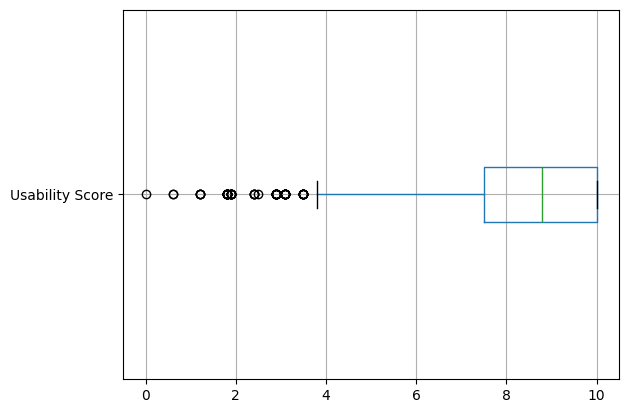

In [313]:
final.boxplot(vert=False)

## Create your data visualization

7. Create your graph using `matplotlib` in the space below. Make sure you include our three required features of graphs.

/tmp/ipykernel_4796/2652989219.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(final.index, rotation=90)


Text(0, 0.5, 'Usability Score')

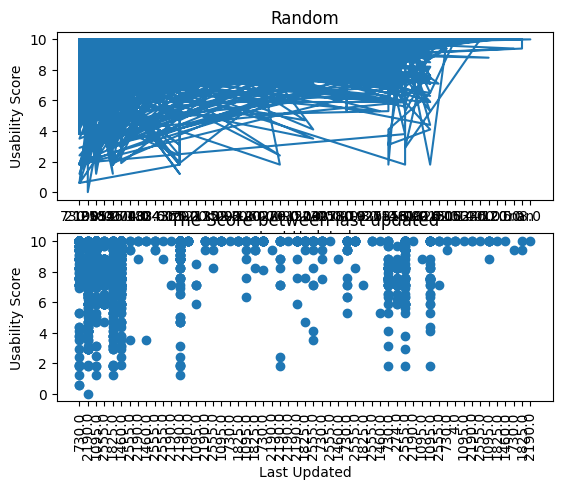

In [314]:
import matplotlib.pyplot as plt
finco = pd.DataFrame(columns=["Score","Total"])
for val in final.index:
    usba = final.loc[[val]].values[0][0]
    val = float(val)
    try:
         finco.loc[val,["Score"]] = finco.loc[val,["Score"]]+usba
         finco.loc[val,["Total"]] = finco.loc[val,["Total"]]+1
    except:
        finco.loc[val] = {"Score": usba,"Total":1}



fig, axs = plt.subplots(ncols=1,nrows=2)
axs[0].plot(final.index,final.values)
axs[0].set_title("Random")
axs[0].set_xlabel("Last Updated")
axs[0].set_ylabel("Usability Score")


axs[1].scatter(final.index,final.values)
axs[1].set_xticklabels(final.index, rotation=90)
axs[1].set_title("The Score between last updated")
axs[1].set_xlabel("Last Updated")
axs[1].set_ylabel("Usability Score")

## Wrap-Up

What were the steps you took to make your data usable, between importing and graphing? 

- going thought all the data to make sure each col was the same data type
- removing outlayers/nill/duplicates/uncessasory data 
- Overcomplicating the data to turn into a visual scatter plot

Why is it important to clean and examine our data before using it? 
if the outlayers,nills, duplicates and unessasory are left the data would screw the rules if we had done cleaning.
